In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
file = "winequality-red.csv"
dataset = pd.read_csv(file)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
pd.isnull(dataset).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
dataset["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [9]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_train = confusion_matrix(y_train,classifier.predict(X_train))
cm_train

array([[  8,   0,   0,   0,   0,   0],
       [  0,  42,   0,   0,   0,   0],
       [  0,   0, 546,   0,   0,   0],
       [  0,   0,   0, 496,   0,   0],
       [  0,   0,   0,   0, 172,   0],
       [  0,   0,   0,   0,   0,  15]])

In [14]:
y_pred = classifier.predict(X_test)
comp = pd.DataFrame(np.concatenate((y_test.reshape(len(y_test),1),
                                    y_pred.reshape(len(y_pred),1)),
                                    1),
                                   columns=["actual","predicted"])
comp

,actual,predicted
0,6,5
1,5,6
2,7,7
3,6,5
4,5,5
...,...,...
315,6,7
316,4,7
317,5,6
318,4,5


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_test = confusion_matrix(y_test, y_pred)
cm_test

array([[ 0,  0,  1,  1,  0,  0],
       [ 0,  1,  6,  2,  2,  0],
       [ 0,  6, 93, 30,  6,  0],
       [ 0,  1, 32, 87, 22,  0],
       [ 0,  0,  2,  9, 13,  3],
       [ 0,  0,  0,  0,  3,  0]])

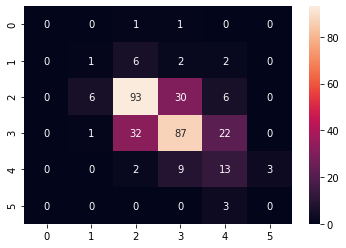

In [16]:
sb.heatmap(cm_test,annot=True)
plt.show()